In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
csv_link="../dataset_color_prediction.csv"

In [19]:
# TODO: Create more data
dataframe = pd.read_csv(csv_link)

In [20]:
dataframe.head()

,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,g4,b4
0,244,228,220,78,100,184,6,10,200,137,204,235
1,223,158,114,254,127,80,246,61,26,211,31,9
2,160,99,68,149,190,45,105,231,194,63,69,83


In [21]:
input_sequence = dataframe.copy()
target_sequence = pd.DataFrame([input_sequence.pop(x) for x in ['r2','g2','b2','r3','g3','b3','r4','g4','b4']]).T


In [22]:
target_sequence

,r2,g2,b2,r3,g3,b3,r4,g4,b4
0,78,100,184,6,10,200,137,204,235
1,254,127,80,246,61,26,211,31,9
2,149,190,45,105,231,194,63,69,83


In [23]:
input_sequence = np.reshape(input_sequence, (input_sequence.shape[0], input_sequence.shape[1], 1))
target_sequence = np.reshape(target_sequence, (3,-1))


In [24]:
input_sequence.shape
target_sequence.shape

(3, 9)

In [25]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(50, activation='relu', input_shape=(input_sequence.shape[1], input_sequence.shape[2])))
model.add(tf.keras.layers.Dense(target_sequence.shape[1]))



In [26]:
# Compile the model
model.compile(optimizer='adam', loss='mse')



In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                10400     
                                                                 
 dense_1 (Dense)             (None, 9)                 459       
                                                                 
Total params: 10,859
Trainable params: 10,859
Non-trainable params: 0
_________________________________________________________________


In [60]:
# Train the model
history=model.fit(input_sequence, target_sequence, epochs=100, batch_size=1)



Epoch 1/100
3/3 [==============================] - 0s 3ms/step - loss: 4.8239e-08
Epoch 2/100
3/3 [==============================] - 0s 3ms/step - loss: 7.9093e-06
Epoch 3/100
3/3 [==============================] - 0s 3ms/step - loss: 5.6391e-07
Epoch 4/100
3/3 [==============================] - 0s 2ms/step - loss: 3.7845e-05
Epoch 5/100
3/3 [==============================] - 0s 2ms/step - loss: 8.2665e-05
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 5.3885e-05
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 9.5025e-06
Epoch 8/100
3/3 [==============================] - 0s 3ms/step - loss: 3.2560e-05
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 5.5844e-07
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 1.3045e-05
Epoch 11/100
3/3 [==============================] - 0s 3ms/step - loss: 2.6996e-07
Epoch 12/100
3/3 [==============================] - 0s 3ms/step - loss: 1.6191e-05
Epoch 13/100


In [61]:
# Generate some test data
test_input = np.array([[223,158,114]])


predictions = model.predict(test_input)

# Print the predictions
print(predictions)

1/1 [==============================] - 0s 18ms/step
[[253.99628  127.11477   80.03179  245.84407   60.941433  25.91576
  211.07498   31.273294   8.920325]]


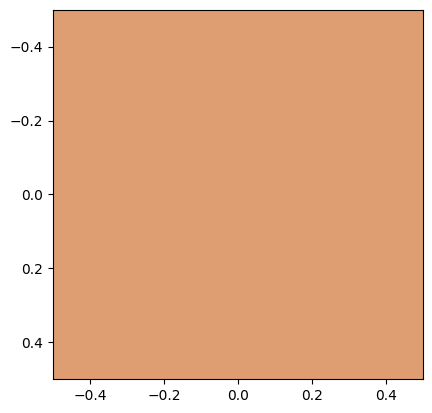

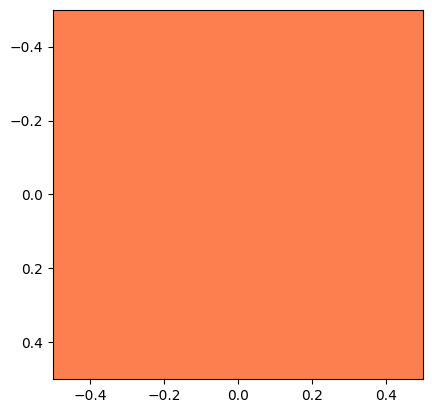

In [62]:
plt.imshow([[[x / 255 for x in test_input[0]]]])
plt.show()
plt.imshow([[[x / 255 for x in predictions[0][0:3]]]])
plt.show()

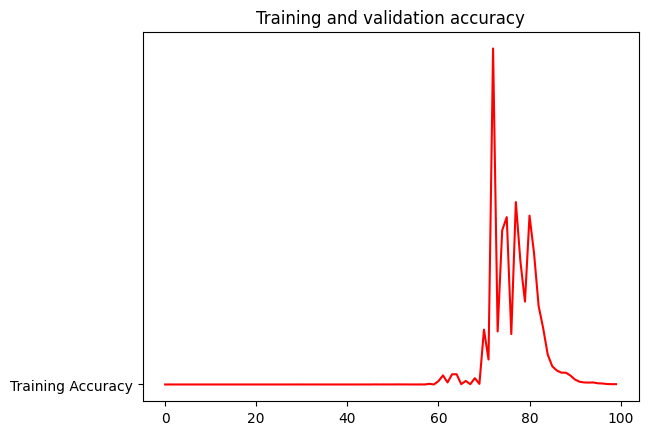

In [63]:

# acc=history.history['accuracy']
# val_acc=history.history['val_accuracy']
loss=history.history['loss']
# val_loss=history.history['val_loss']

# epochs=range(len(acc)) # Get number of epochs
epochs=range(len(loss)) # Get number of epochs

plt.plot(epochs, loss, 'r', "Training Accuracy")
plt.title('Training and validation accuracy')
plt.show()

# plt.plot(epochs, acc, 'r', "Training Accuracy")
# plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
# plt.title('Training and validation accuracy')
# plt.show()
# print("")


# plt.plot(epochs, loss, 'r', "Training Loss")
# plt.plot(epochs, val_loss, 'b', "Validation Loss")
# plt.show()